In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("diamonds.csv")
df

,number,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df_copy = df.copy()

In [4]:
df_copy = df_copy.replace(
	{
		"cut": {
			"Fair": 1,
			"Good": 2,
			"Very Good": 3,
			"Premium": 4,
			"Ideal": 5
		},

		"clarity": {
			"I1": 1,
			"SI2": 2,
			"SI1": 3,
			"VS2": 4,
			"VS1": 5,
			"VVS2": 6,
			"VVS1": 7,
			"IF": 8
		},

		"color": {chr(s): abs(75 - s) for s in range(ord("D"), ord("J") + 1)}
	}
)

C:\Users\ebeck\AppData\Local\Temp\ipykernel_6952\4224237271.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy = df_copy.replace(


In [5]:
df_copy

,number,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
df_copy.describe()

,number,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,3.904097,4.405803,4.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   number   53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  int64  
 3   color    53940 non-null  int64  
 4   clarity  53940 non-null  int64  
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 4.5 MB


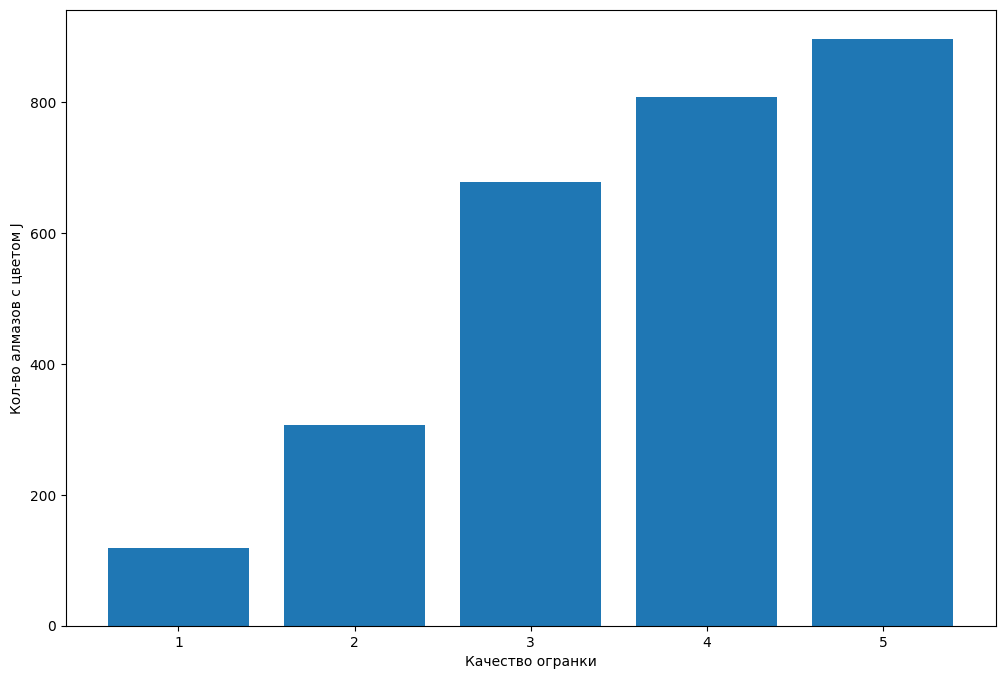

In [8]:
plt.figure(figsize=(12, 8))

stat = {v: len(df_copy[(df_copy["cut"] == v) & (df_copy["color"] == 1)]) for v in df_copy["cut"].unique()}

plt.bar(stat.keys(), stat.values())
plt.xlabel("Качество огранки")
plt.ylabel("Кол-во алмазов с цветом J")
plt.show()

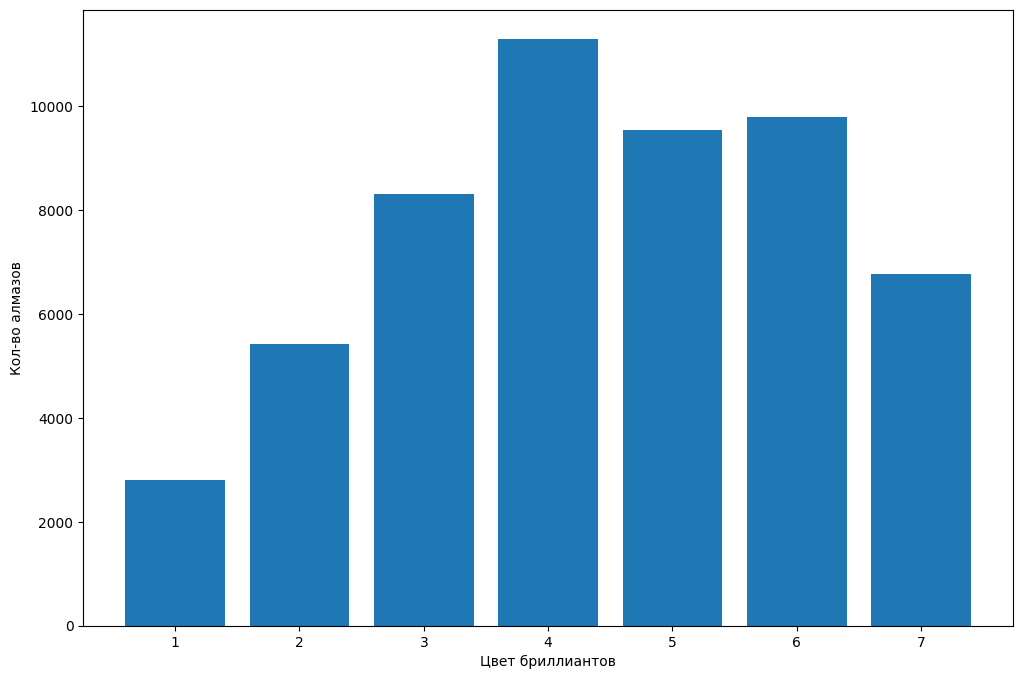

In [9]:
plt.figure(figsize=(12, 8))

stat = {v: len(df_copy[df_copy["color"] == v]) for v in df_copy["color"].unique()}

plt.bar(stat.keys(), stat.values())
plt.xlabel("Цвет бриллиантов")
plt.ylabel("Кол-во алмазов")
plt.show()

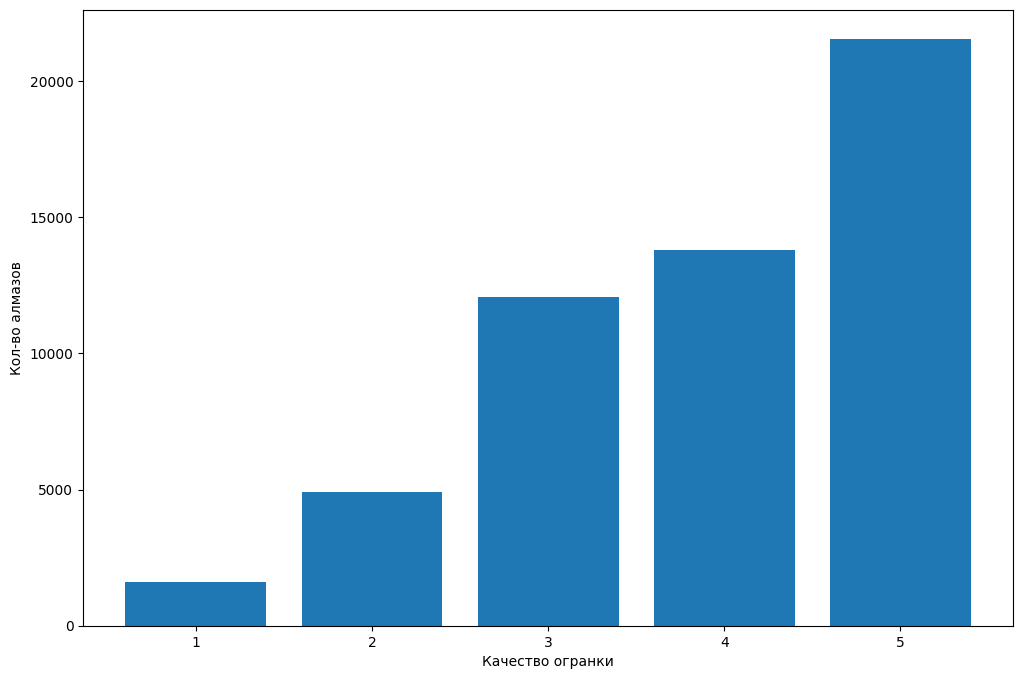

In [10]:
plt.figure(figsize=(12, 8))

stat = {v: len(df_copy[df_copy["cut"] == v]) for v in df_copy["cut"].unique()}

plt.bar(stat.keys(), stat.values())
plt.xlabel("Качество огранки")
plt.ylabel("Кол-во алмазов")
plt.show()

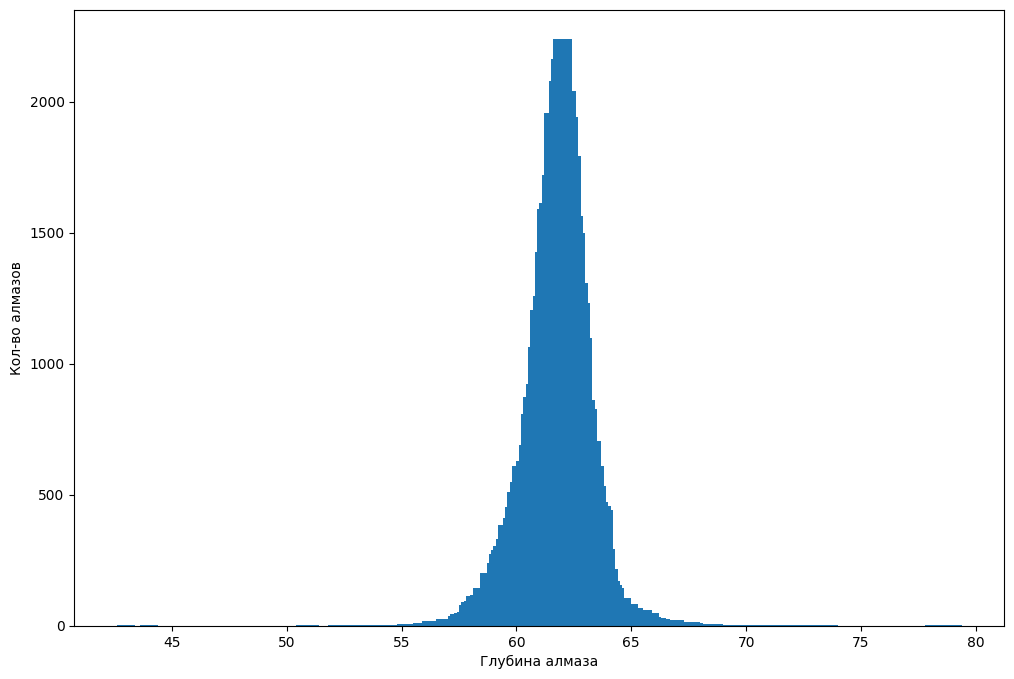

In [11]:
plt.figure(figsize=(12, 8))

stat = {v: len(df_copy[df_copy["depth"] == v]) for v in df_copy["depth"].unique()}

plt.bar(stat.keys(), stat.values())
plt.xlabel("Глубина алмаза")
plt.ylabel("Кол-во алмазов")
plt.show()

In [12]:
df_copy = df_copy.drop("number", axis=1)
df_copy

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


In [13]:
x, y = df_copy.drop("price", axis=1), df_copy["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)

print(
	mean_absolute_error(y_test, y_pred_linear),
	mean_squared_error(y_test, y_pred_linear),
	r2_score(y_test, y_pred_linear),
	sep="\n"
)

805.2743660189865
1499636.6903304632
0.9056643685073511


In [15]:
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_test)

print(
	mean_absolute_error(y_test, y_pred_lasso),
	mean_squared_error(y_test, y_pred_lasso),
	r2_score(y_test, y_pred_lasso),
	sep="\n"
)

805.4747867244558
1499627.2502472927
0.9056649623419866


In [16]:
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)

print(
	mean_absolute_error(y_test, y_pred_ridge),
	mean_squared_error(y_test, y_pred_ridge),
	r2_score(y_test, y_pred_ridge),
	sep="\n"
)

805.6316075779281
1499558.0374159478
0.9056693162206255


In [17]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)
y_pred_poly = poly_model.predict(x_test_poly)

print(
	mean_absolute_error(y_test, y_pred_poly),
	mean_squared_error(y_test, y_pred_poly),
	r2_score(y_test, y_pred_poly),
	sep="\n"
)

462.51146636924267
605946.6508984846
0.9618825277269204


In [18]:
# Полиномиальная модель показала лучший результат, 
# но может быть склонна к переобучению. 
# Модели с регуляризацией (Lasso, Ridge) помогают бороться с 
# переобучением и улучшают обобщающую способность модели.
# Следует подобрать кофф. для данных моделей, чтобы результаты 
# были близки или равны полиномаальной модели